## PACKAGE

In [ ]:
#conda create --name InSpectral python=3.8 poetry
#conda activate InSpectral
#poetry install

### LIBS

In [215]:
import os
os.environ["CURL_CA_BUNDLE"]='/etc/ssl/certs/ca-certificates.crt'

!pip install pystac-client==0.3.2 rasterio shapely matplotlib tqdm
!pip install folium==0.2.1

import pystac_client
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds
from matplotlib import pyplot as plt
from rasterio.plot import show

parameters = dict(access_token='jeXchZiqYZ5I1ybxouubE1E0K58IHwY55rNp1vD2O5')
service = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/stac/', parameters=parameters)



###READ

In [216]:
def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)        

## INPUTS

### BBOX, DATE, SATELLITE AND IMAGE


RETÂNGULO ENVOLVENTE
coloque valor de oeste -> -46.12
coloque valor de sul -> -23.23
coloque valor de leste -> -45.95
coloque valor de norte -> -23.16
Coloque o intervalo de data em AAAA-MM-DD/AAAA-MM-DD: 2020-01-01/2020-12-31
Escolha entre as coleções abaixo:
CB4_64_16D_STK-1 
LC8_30_16D_STK-1 
S2_L2A-1 

Copie e cole o satélite/sensor que quer observar: LC8_30_16D_STK-1
Até quantas imagens gostaria de observar? 10
Escolha da lista abaixo a imagem que deseja calcular o índice (primeiro item é 0)
<Item id=LC8_30_16D_STK_v001_044054_2020-12-18_2020-12-31>
<Item id=LC8_30_16D_STK_v001_044054_2020-12-02_2020-12-17>
<Item id=LC8_30_16D_STK_v001_044054_2020-11-16_2020-12-01>
<Item id=LC8_30_16D_STK_v001_044054_2020-10-31_2020-11-15>
<Item id=LC8_30_16D_STK_v001_044054_2020-10-15_2020-10-30>
<Item id=LC8_30_16D_STK_v001_044054_2020-09-29_2020-10-14>
<Item id=LC8_30_16D_STK_v001_044054_2020-09-13_2020-09-28>
<Item id=LC8_30_16D_STK_v001_044054_2020-08-28_2020-09-12>
<Item id=LC8_30_16D_STK_v0

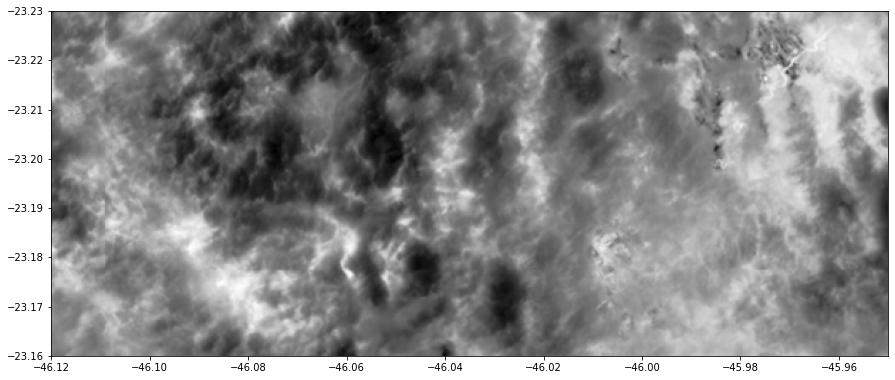

Quer escolher outra imagem? (s/n): s
Escolha entre as coleções abaixo:
CB4_64_16D_STK-1 
LC8_30_16D_STK-1 
S2_L2A-1 

Copie e cole o satélite/sensor que quer observar: LC8_30_16D_STK-1
Até quantas imagens gostaria de observar? 10
Escolha da lista abaixo a imagem que deseja calcular o índice (primeiro item é 0)
<Item id=LC8_30_16D_STK_v001_044054_2020-12-18_2020-12-31>
<Item id=LC8_30_16D_STK_v001_044054_2020-12-02_2020-12-17>
<Item id=LC8_30_16D_STK_v001_044054_2020-11-16_2020-12-01>
<Item id=LC8_30_16D_STK_v001_044054_2020-10-31_2020-11-15>
<Item id=LC8_30_16D_STK_v001_044054_2020-10-15_2020-10-30>
<Item id=LC8_30_16D_STK_v001_044054_2020-09-29_2020-10-14>
<Item id=LC8_30_16D_STK_v001_044054_2020-09-13_2020-09-28>
<Item id=LC8_30_16D_STK_v001_044054_2020-08-28_2020-09-12>
<Item id=LC8_30_16D_STK_v001_044054_2020-08-12_2020-08-27>
<Item id=LC8_30_16D_STK_v001_044054_2020-07-27_2020-08-11>
Escolha qual imagem da lista acima quer visualizar (0 - n). Obs.: primeira imagem inicia em zero):

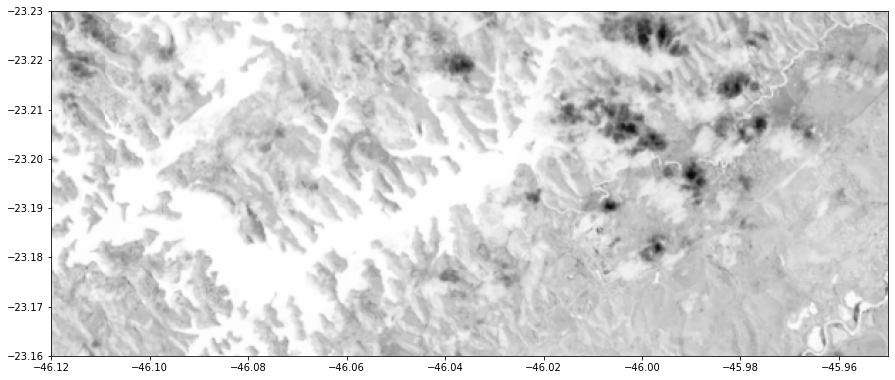

Quer escolher outra imagem? (s/n): n


In [239]:
#INPUT DO USUÁRIO

print('RETÂNGULO ENVOLVENTE')

xmin = float(input('coloque valor de oeste -> ', )) # -46.12
ymin = float(input('coloque valor de sul -> ')) # -23.23
xmax = float(input('coloque valor de leste -> ')) # -45.95
ymax = float(input('coloque valor de norte -> ')) # -23.16

bbox = (xmin, ymin, xmax, ymax)

date = input('Coloque o intervalo de data em AAAA-MM-DD/AAAA-MM-DD: ', )  # 2020-01-01/2020-12-31

#loop de escolha de imagem 
opc = 's' #opção sim

res = 'NaN' #opção diferente de sim

while opc.lower() == 's':
  
  print('Escolha entre as coleções abaixo:')

  print("CB4_64_16D_STK-1 \n"
        "LC8_30_16D_STK-1 \n"
        "S2_L2A-1 \n")

  #escolhendo o satélite
  colecao = [str(input('Copie e cole o satélite/sensor que quer observar: ', ))] #LC8_30_16D_STK-1
  colecao

  #estabelecendo um limite de imagens para escolha
  limite = int(input('Até quantas imagens gostaria de observar? ', )) #10

  #criando os items
  item_search = service.search(bbox=bbox,
                              datetime=date,
                              collections=colecao,
                              max_items=limite)
  item_search

  items = list(item_search.get_items())

  #escolhendo a imagem que quer calcular os indices
  print('Escolha da lista abaixo a imagem que deseja calcular o índice (primeiro item é 0)')
  for item in item_search.get_items():
      print(item)

  #usuario escolhe a opção da lista apresentada
  img_choice = int(input('Escolha qual imagem da lista acima quer visualizar (0 - n). Obs.: primeira imagem inicia em zero: ')) #8

  assets = item.assets

  item = items[img_choice]
  item


  #Leitura de banda para cada satélite - TRANSFORMAR EM FUNÇÃO???
  ##Landsat 8
  if  colecao == ['LC8_30_16D_STK-1']:
    red_band = read(item.assets['band4'].href, bbox=bbox)
    nir_band = read(item.assets['band5'].href, bbox=bbox)
    green_band = read(item.assets['band2'].href, bbox=bbox)
    blue_band = read(item.assets['band3'].href, bbox=bbox)
    totalob_band = read(item.assets['TOTALOB'].href, bbox=bbox)
    
    ##Sentinel 2
  if colecao == ['S2_L2A-1']:
    red_band = read(item.assets['B04'].href, bbox=bbox)
    nir_band = read(item.assets['B08'].href, bbox=bbox)
    green_band = read(item.assets['B03'].href, bbox=bbox)
    blue_band = read(item.assets['B02'].href, bbox=bbox)

    #CBERS 4
  if colecao == ['CB4_64_16D_STK-1']:
    red_band = read(item.assets['BAND15'].href, bbox=bbox)
    nir_band = read(item.assets['BAND16'].href, bbox=bbox)
    green_band = read(item.assets['BAND14'].href, bbox=bbox)
    blue_band = read(item.assets['BAND13'].href, bbox=bbox)

  plt.figure(figsize=(15, 10))
  plt.imshow(nir_band, extent = (xmin, xmax, ymax, ymin) , cmap='Greys')
  plt.pause(0.1)

  opc = input('Observe se a imagem esta coberta com nuvens. Quer escolher outra imagem? (s/n): ')

In [ ]:
#teste de banda totalob para ver cobertura de nuvem

plt.figure(figsize=(15, 10))
plt.imshow(totalob_band, extent = (xmin, xmax, ymax, ymin), vmin=1, vmax=255 )
plt.title('Total Observarvation');

## READING BANDS

In [ ]:
  #Leitura de banda para cada satélite

  ##Landsat 8
  if  colecao == ['LC8_30_16D_STK-1']:
    red_band = read(item.assets['band4'].href, bbox=bbox)
    nir_band = read(item.assets['band5'].href, bbox=bbox)
    green_band = read(item.assets['band2'].href, bbox=bbox)
    blue_band = read(item.assets['band3'].href, bbox=bbox)

    ##Sentinel 2
  if colecao == ['S2_L2A-1']:
    red_band = read(item.assets['B04'].href, bbox=bbox)
    nir_band = read(item.assets['B08'].href, bbox=bbox)
    green_band = read(item.assets['B03'].href, bbox=bbox)
    blue_band = read(item.assets['B02'].href, bbox=bbox)

    #CBERS 4
  if colecao == ['CB4_64_16D_STK-1']:
    red_band = read(item.assets['BAND15'].href, bbox=bbox)
    nir_band = read(item.assets['BAND16'].href, bbox=bbox)
    green_band = read(item.assets['BAND14'].href, bbox=bbox)
    blue_band = read(item.assets['BAND13'].href, bbox=bbox)

## INDEX CALC

### NDVI CALC

In [ ]:
def calc_ndvi(red_band, nir_band):
  delta = 0.0000000001
  ndvi = (nir_band - red_band) / (nir_band + red_band + delta)
  return ndvi

### NDWI CALC

In [ ]:
def calc_ndwi(green_band, nir_band):
  delta = 0.0000000001
  ndwi = (green_band - nir_band) / (green_band + nir_band + delta)
  return ndwi

### EVI CALC

In [ ]:
def calc_evi(nir_band, red_band, blue_band):
  evi = 2.5 * ((nir_band - red_band) / (nir_band + (6 * red_band) - (7.5 * blue_band)) + 1)
  return evi

### SAVI CALC

In [ ]:
def calc_savi(nir_band, red_band, L):
  L = 0.5
  savi = ((1 + L) * (nir_band - red_band)) / (L + nir_band + red_band)
  return savi

###NPCI CALC


In [ ]:
def calc_npci(red_band, blue_band): #REVISAR CÁLCULO!!!!
  npci = (red_band - blue_band) / (red_band + blue_band)
  return npci

## INDEX DESCRIPTION

In [ ]:
#NDVI
print("""O NDVI é a sigla em inglês para Normalized Difference Vegetation Index, ou seja, é o índice de\n \
vegetação por diferença normalizada. Em termos simples, o NDVI é uma medida da saúde das plantas com base\n \
em como uma planta reflete a luz (geralmente a luz solar) em frequências específicas.""")

#NDWI
print("""NDWI tem como principal função detectar e monitorar pequenas mudanças no conteúdo de água dos corpos de água\n  \
Aproveitando as bandas espectrais NIR (infravermelho próximo) e GREEN (verde visível), o NDWI é capaz de aprimorar os corpos\n \ 
da água em uma imagem de satélite.""")

#NDWI
print("""\nO NDWI tem como principal função detectar e monitorar pequenas mudanças no """)

#EVI
print("""\nO índice de vegetação aprimorado (EVI) é um índice de vegetação ""otimizado"" projetado para aprimorar\n \
o sinal de vegetação com sensibilidade aprimorada em regiões de alta biomassa e monitoramento de vegetação aprimorado\n \
por meio de um desacoplamento do sinal de fundo do dossel e uma redução nas influências atmosféricas.""")

#SAVI
print("""\nO Índice de Vegetação Ajustado ao Solo (SAVI) é um índice de vegetação que tenta minimizar as influências\n \
de brilho do solo usando um fator de correção de brilho do solo. Isso é frequentemente usado em regiões áridas onde \n \
a cobertura vegetal é baixa.""")

#NPCI

#WRI
print("""\nShen e Li (2010) desenvolveram o Water Ratio Index em 2010. Um total de quatro bandas de refletância espectral são usadas nesta técnica.\n \
É a razão entre a refletância espectral total de duas bandas do visivel (ou seja, verde e vermelho) pela refletância espectral total da banda do\n \
infravermelho próximo e do infravermelho médio (MIR). Este método é aplicável apenas às imagens de satélite que possuem uma faixa de infravermelho médio.""")

O NDVI é a sigla em inglês para Normalized Difference Vegetation Index, ou seja, é o índice de
 vegetação por diferença normalizada. Em termos simples, o NDVI é uma medida da saúde das plantas com base
 em como uma planta reflete a luz (geralmente a luz solar) em frequências específicas.
NDWI tem como principal função detectar e monitorar pequenas mudanças no conteúdo de água dos corpos de água
  Aproveitando as bandas espectrais NIR (infravermelho próximo) e GREEN (verde visível), o NDWI é capaz de aprimorar os corpos
 \ 
da água em uma imagem de satélite.

O NDWI tem como principal função detectar e monitorar pequenas mudanças no 

O índice de vegetação aprimorado (EVI) é um índice de vegetação ""otimizado"" projetado para aprimorar
 o sinal de vegetação com sensibilidade aprimorada em regiões de alta biomassa e monitoramento de vegetação aprimorado
 por meio de um desacoplamento do sinal de fundo do dossel e uma redução nas influências atmosféricas.

O Índice de Vegetação Ajustado a

## PLOTS DEFINITION


### NDVI

In [ ]:
# Plot do indice que o usuário escolheu

def plot_ndvi(red_band, nir_band):

    ndvi = calc_ndvi(red_band, nir_band)
    ndvi_map = plt.figure(figsize=(25, 9))

    plt.subplot(131)
    plt.title("NDVI")
    plt.imshow(ndvi, extent = (xmin, xmax, ymax, ymin) , cmap='viridis')
    plt.colorbar()

    ndvi_labeled = ndvi.copy()
    ndvi_labeled[ndvi < 0.2] = 0 # < 0.2
    ndvi_labeled[ndvi >= 0.2] = 1 # 0.2 - 0.45
    ndvi_labeled[ndvi >= 0.45] = 2 # >= 0.45
    plt.subplot(132)
    plt.title("NDVI CLASSIFIED")
    colormap_3classes = plt.get_cmap('Greens', 3)
    plt.imshow(ndvi_labeled, extent = (xmin, xmax, ymax, ymin), cmap=colormap_3classes)
    plt.colorbar()
    
    plt.subplot(133)
    plt.title("Histogram")
    plt.hist(ndvi.ravel(), bins=75)
    plt.show()
    
    return ndvi_map

### NDWI

In [ ]:
def plot_ndwi(green_band, nir_band):

    ndwi = calc_ndwi(red_band, nir_band)
    ndwi_map = plt.figure(figsize=(25, 9))

    plt.subplot(131)
    plt.title("NDWI")
    plt.imshow(calc_ndwi(green_band, nir_band), extent = (xmin, xmax, ymax, ymin) , cmap='viridis')
    plt.colorbar()

    ndwi_labeled = ndwi.copy()
    ndwi_labeled[ndwi < 0.0] = 0 
    ndwi_labeled[ndwi >= 0.0001] = 1 
    plt.subplot(132)
    plt.title("NDWI CLASSIFIED")
    colormap_2classes = plt.get_cmap('Blues', 2)
    plt.imshow(ndwi_labeled, extent = (xmin, xmax, ymax, ymin), cmap=colormap_2classes)
    plt.colorbar()
    
    plt.subplot(133)
    plt.title("Histogram")
    plt.hist(ndwi.ravel(), bins=75)
    plt.show()

    return ndwi_map

### EVI

In [ ]:
def plot_evi(nir_band, red_band, blue_band):

    evi = calc_evi(nir_band, red_band, blue_band)
    evi_map = plt.figure(figsize=(25, 9))

    plt.subplot(131)
    plt.title("EVI")
    plt.imshow(calc_evi(nir_band, red_band, blue_band), extent = (xmin, xmax, ymax, ymin) , cmap='viridis')
    plt.colorbar()

    evi_labeled = evi.copy()
    evi_labeled[evi < 0.2] = 0 
    evi_labeled[evi >= 0.2] = 1 
    evi_labeled[evi >= 0.45] = 2 
    plt.subplot(132)
    plt.title("EVI CLASSIFIED")
    colormap_3classes = plt.get_cmap('Greens', 3)
    plt.imshow(evi_labeled, extent = (xmin, xmax, ymax, ymin), cmap=colormap_3classes)
    plt.colorbar()
    
    plt.subplot(133)
    plt.title("Histogram")
    plt.hist(evi.ravel(), bins=75)
    plt.show()
  
    return evi_map

###SAVI


In [ ]:
def plot_savi(nir_band, red_band, L=0.5):

    savi = calc_savi(nir_band, red_band, L=0.5)
    savi_map = plt.figure(figsize=(25, 9))

    plt.subplot(131)
    plt.title("SAVI")
    plt.imshow(calc_savi(nir_band, red_band, L=0.5), extent = (xmin, xmax, ymax, ymin) , cmap='viridis')
    plt.colorbar()

    savi_labeled = savi.copy()
    savi_labeled[savi < 0.2] = 0 
    savi_labeled[savi >= 0.2] = 1 
    savi_labeled[savi >= 0.45] = 2 
    plt.subplot(132)
    plt.title("SAVI CLASSIFIED")
    colormap_3classes = plt.get_cmap('Greens', 3)
    plt.imshow(savi_labeled, extent = (xmin, xmax, ymax, ymin), cmap=colormap_3classes)
    plt.colorbar()
    
    plt.subplot(133)
    plt.title("Histogram")
    plt.hist(savi.ravel(), bins=75)
    plt.show()
  

    return savi_map

###NPCI

In [ ]:
def plot_npci(red_band, blue_band):

    npci = calc_npci(red_band, blue_band)
    npci_map = plt.figure(figsize=(25, 9))

    plt.subplot(131)
    plt.title("NPCI")
    plt.imshow(calc_npci(red_band, blue_band), extent = (xmin, xmax, ymax, ymin) , cmap='viridis')
    plt.colorbar()

    npci_labeled = npci.copy()
    npci_labeled[npci < -0.2] = 0
    npci_labeled[npci >= -0.2] = 1 
    npci_labeled[npci >= 0] = 2 
    plt.subplot(132)
    plt.title("NPCI CLASSIFIED")
    colormap_3classes = plt.get_cmap('Greens', 3)
    plt.imshow(npci_labeled, extent = (xmin, xmax, ymax, ymin), cmap=colormap_3classes)
    plt.colorbar()
    
    plt.subplot(133)
    plt.title("Histogram")
    plt.hist(npci.ravel(), bins=75)
    plt.show()

    return npci_map

###RGB

In [ ]:
def calc_rgb(red_band, green_band, blue_band):
  linhas = blue_band.shape[0]
  colunas = blue_band.shape[1]

  array_rgb = np.zeros((linhas, colunas, 3))

  array_rgb[:, :, 0] = red_band / red_band.max()
  array_rgb[:, :, 1] = green_band / green_band.max()
  array_rgb[:, :, 2] = blue_band / blue_band.max()

  plt.figure(figsize=(20, 5))
  plt.imshow(array_rgb)
  plt.title('Composição colorida verdadeira');


  return rgb

## INDEX PLOT

Qual ínice gostaria de computar?NPCI


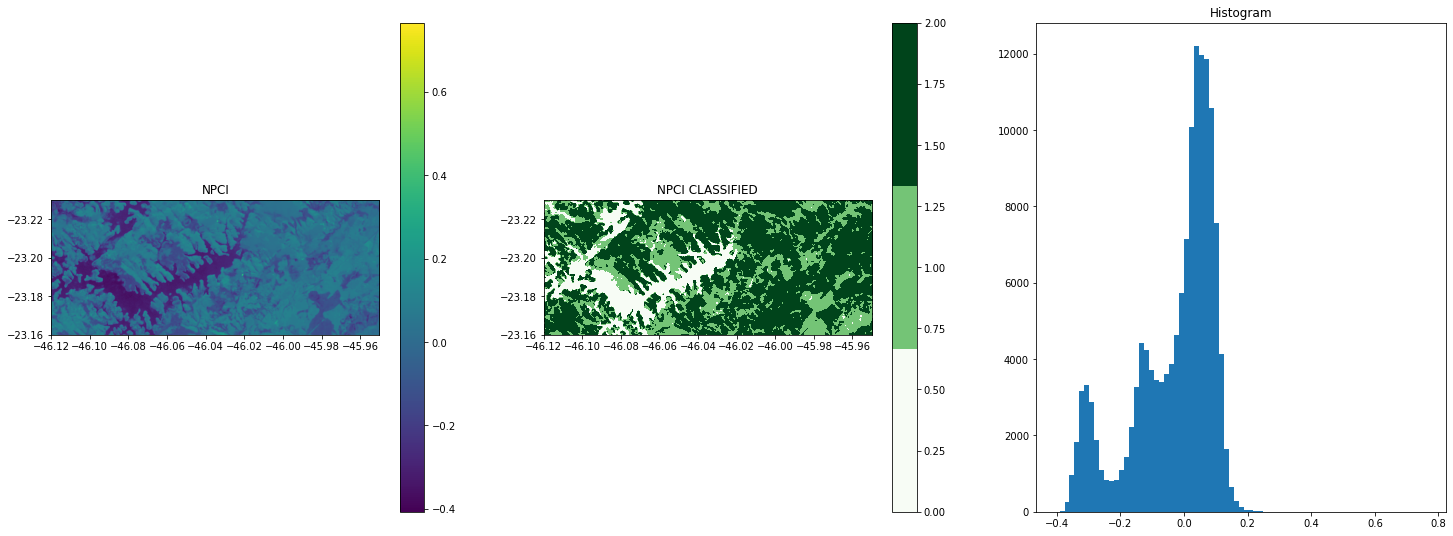

In [ ]:
#Pergunta ao usuário qual índice quer computar

index = str(input('Qual ínice gostaria de computar?')).upper()

if index == 'NDVI':
  plot_ndvi(red_band, nir_band)

if index == 'NDWI':
  plot_ndwi(green_band, nir_band)

if index == 'EVI':
  plot_evi(nir_band, red_band, blue_band)

if index == 'SAVI':
  plot_savi(nir_band, red_band, L=0.5)

if index == 'NPCI':
  plot_npci(red_band, blue_band)

## AUX

In [ ]:
# todos os saltelites disponiveis
#print('escolha entre as coleções abaixo')

#for collection in service.get_collections():

#    print(collection)

In [232]:
#informações de todas as bandas desse satélite
sorted(item.properties['eo:bands'], key=lambda band: band['name'])

#apresentação das bandas
#for k in assets.keys():
#    print(k)

[{'center_wavelength': None,
  'common_name': 'ClearOb',
  'data_type': 'uint8',
  'description': 'Clear Observation Count',
  'full_width_half_max': None,
  'max': 255.0,
  'min': 1.0,
  'name': 'CLEAROB',
  'nodata': 0.0,
  'scale': 1.0},
 {'center_wavelength': None,
  'common_name': 'evi',
  'data_type': 'int16',
  'description': 'Enhanced Vegetation Index',
  'full_width_half_max': None,
  'max': 10000.0,
  'min': -10000.0,
  'name': 'EVI',
  'nodata': -9999.0,
  'scale': 0.0001},
 {'center_wavelength': None,
  'common_name': 'quality',
  'data_type': 'int16',
  'description': '',
  'full_width_half_max': None,
  'max': 4.0,
  'min': 0.0,
  'name': 'Fmask4',
  'nodata': 255.0,
  'scale': 1.0},
 {'center_wavelength': None,
  'common_name': 'ndvi',
  'data_type': 'int16',
  'description': '',
  'full_width_half_max': None,
  'max': 10000.0,
  'min': -10000.0,
  'name': 'NDVI',
  'nodata': -9999.0,
  'scale': 0.0001},
 {'center_wavelength': None,
  'common_name': 'Provenance',
  'data